In [3]:
#pip install yfinance

In [71]:
import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

In [11]:
sp500 = yf.Ticker("^GSPC")

In [13]:
sp500 = sp500.history(period="max")

In [15]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-06-20 00:00:00-04:00,5999.669922,6018.200195,5952.560059,5967.839844,7451500000,0.0,0.0
2025-06-23 00:00:00-04:00,5969.669922,6028.770020,5943.229980,6025.169922,5597000000,0.0,0.0
2025-06-24 00:00:00-04:00,6061.209961,6101.759766,6059.250000,6092.180176,5443690000,0.0,0.0


In [17]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2025-06-12 00:00:00-04:00', '2025-06-13 00:00:00-04:00',
               '2025-06-16 00:00:00-04:00', '2025-06-17 00:00:00-04:00',
               '2025-06-18 00:00:00-04:00', '2025-06-20 00:00:00-04:00',
               '2025-06-23 00:00:00-04:00', '2025-06-24 00:00:00-04:00',
               '2025-06-25 00:00:00-04:00', '2025-06-26 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24487, freq=None)

<Axes: xlabel='Date'>

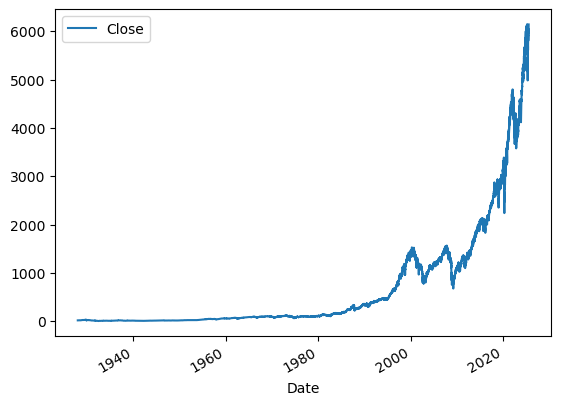

In [23]:
sp500.plot.line(y="Close", use_index= True)

In [25]:
del sp500["Dividends"]
del sp500["Stock Splits"]
inplace=True

In [27]:
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2025-06-20 00:00:00-04:00,5999.669922,6018.200195,5952.560059,5967.839844,7451500000
2025-06-23 00:00:00-04:00,5969.669922,6028.770020,5943.229980,6025.169922,5597000000
2025-06-24 00:00:00-04:00,6061.209961,6101.759766,6059.250000,6092.180176,5443690000


In [29]:
sp500["Tommorow"] = sp500["Close"].shift(-1)

In [31]:
sp500

,Open,High,Low,Close,Volume,Tommorow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2025-06-20 00:00:00-04:00,5999.669922,6018.200195,5952.560059,5967.839844,7451500000,6025.169922
2025-06-23 00:00:00-04:00,5969.669922,6028.770020,5943.229980,6025.169922,5597000000,6092.180176
2025-06-24 00:00:00-04:00,6061.209961,6101.759766,6059.250000,6092.180176,5443690000,6092.160156


In [33]:
sp500["Target"] = (sp500["Tommorow"]>sp500["Close"]).astype(int)

In [35]:
sp500

,Open,High,Low,Close,Volume,Tommorow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2025-06-20 00:00:00-04:00,5999.669922,6018.200195,5952.560059,5967.839844,7451500000,6025.169922,1
2025-06-23 00:00:00-04:00,5969.669922,6028.770020,5943.229980,6025.169922,5597000000,6092.180176,1
2025-06-24 00:00:00-04:00,6061.209961,6101.759766,6059.250000,6092.180176,5443690000,6092.160156,0


In [45]:
# because if we dont then sometimes we can get the pandas with copy warnings when we try to subset a data frame and then later assign back to it .
sp500 = sp500.loc["2000-01-01":].copy()

In [47]:
sp500

,Open,High,Low,Close,Volume,Tommorow,Target
Date,,,,,,,
2000-01-03 00:00:00-05:00,1469.250000,1478.000000,1438.359985,1455.219971,931800000,1399.420044,0
2000-01-04 00:00:00-05:00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,1402.109985,1
2000-01-05 00:00:00-05:00,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,1403.449951,1
2000-01-06 00:00:00-05:00,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,1441.469971,1
2000-01-07 00:00:00-05:00,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,1457.599976,1
...,...,...,...,...,...,...,...
2025-06-20 00:00:00-04:00,5999.669922,6018.200195,5952.560059,5967.839844,7451500000,6025.169922,1
2025-06-23 00:00:00-04:00,5969.669922,6028.770020,5943.229980,6025.169922,5597000000,6092.180176,1
2025-06-24 00:00:00-04:00,6061.209961,6101.759766,6059.250000,6092.180176,5443690000,6092.160156,0


In [53]:
#initialing the actual model 
#n_estimator is the number of individual decicsion tree we wanna train the higher the better teh accuracy upto a limit (ofc)
#min_samples_split helps against the overfitting 
model = RandomForestClassifier(n_estimators =100,min_samples_split=100, random_state=1)

In [55]:
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

In [57]:
predictors =["Close", "Volume", "High", "Low", "Open"]

In [61]:
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [67]:
preds = model.predict(test[predictors])

In [75]:
preds =  pd.Series(preds, index = test.index)

In [77]:
preds

Date
2025-02-03 00:00:00-05:00    1
2025-02-04 00:00:00-05:00    1
2025-02-05 00:00:00-05:00    0
2025-02-06 00:00:00-05:00    0
2025-02-07 00:00:00-05:00    0
                            ..
2025-06-20 00:00:00-04:00    1
2025-06-23 00:00:00-04:00    1
2025-06-24 00:00:00-04:00    0
2025-06-25 00:00:00-04:00    0
2025-06-26 00:00:00-04:00    0
Length: 100, dtype: int32

In [79]:
precision_score(test["Target"], preds)

0.5714285714285714

In [81]:
combined = pd.concat([test["Target"],preds], axis=1)

<Axes: xlabel='Date'>

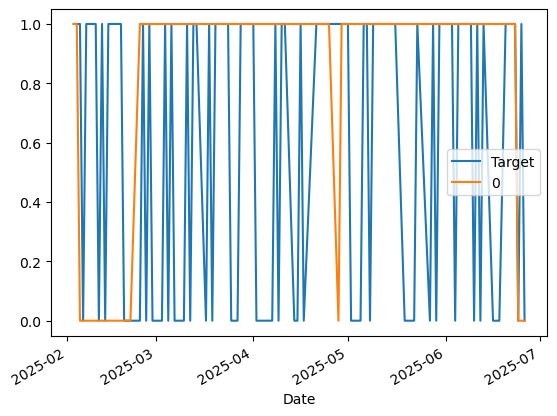

In [83]:
combined.plot()

In [131]:
def predict (train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [105]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range (start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test =  data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [107]:
predictions = backtest(sp500, model, predictors)


In [108]:
predictions["Predictions"].value_counts()

Predictions
1    2776
0    1133
Name: count, dtype: int64

In [111]:
precision_score(predictions["Target"], predictions["Predictions"])

0.7010086455331412

In [113]:
predictions["Target"].value_counts()/ predictons.shape[0]

Target
1    0.54592
0    0.45408
Name: count, dtype: float64

In [115]:
horizons =  [2,5,60,250,1000]
new_predictors =[]

for horizon in horizons:
    rolling_averages =  sp500.rolling(horizon).mean()
    
    ratio_column = f"Closed_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"]/ rolling_averages["Close"]

    trend_column =f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors+= [ratio_column, trend_column]
    

In [121]:
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tommorow,Target,Closed_Ratio_2,Trend_2,Closed_Ratio_5,Trend_5,Closed_Ratio_60,Trend_60,Closed_Ratio_250,Trend_250,Closed_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2003-12-26 00:00:00-05:00,1094.040039,1098.469971,1094.040039,1095.890015,356070000,1109.479980,1,1.000845,1.0,1.002176,3.0,1.039354,34.0,1.137825,135.0,0.957328,485.0
2003-12-29 00:00:00-05:00,1095.890015,1109.479980,1095.890015,1109.479980,1058800000,1109.640015,1,1.006162,2.0,1.010755,4.0,1.050761,34.0,1.150837,135.0,0.969445,486.0
2003-12-30 00:00:00-05:00,1109.479980,1109.750000,1106.410034,1109.640015,1012600000,1111.920044,1,1.000072,2.0,1.007835,4.0,1.049591,34.0,1.150046,135.0,0.969833,486.0
2003-12-31 00:00:00-05:00,1109.640015,1112.560059,1106.209961,1111.920044,1027500000,1108.479980,0,1.001026,2.0,1.006997,4.0,1.050463,34.0,1.151439,136.0,0.972073,486.0
2004-01-02 00:00:00-05:00,1111.920044,1118.849976,1105.079956,1108.479980,1153200000,1122.219971,1,0.998451,1.0,1.001263,4.0,1.046073,33.0,1.147024,135.0,0.969348,485.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-18 00:00:00-04:00,5987.930176,6018.250000,5971.890137,5980.870117,5106470000,5967.839844,0,0.999845,0.0,0.996183,2.0,1.052148,35.0,1.040159,142.0,1.264820,531.0
2025-06-20 00:00:00-04:00,5999.669922,6018.200195,5952.560059,5967.839844,7451500000,6025.169922,1,0.998909,0.0,0.996583,1.0,1.049267,34.0,1.037536,142.0,1.261615,530.0
2025-06-23 00:00:00-04:00,5969.669922,6028.770020,5943.229980,6025.169922,5597000000,6092.180176,1,1.004780,1.0,1.004540,2.0,1.058377,35.0,1.047095,143.0,1.273267,530.0


In [123]:
model =  RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [159]:
# predict_proba returns the probability
def predict (train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds [preds >= .6] = 1
    preds [preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [161]:
predictions = backtest(sp500, model, new_predictors)

In [162]:
predictions["Predictions"].value_counts()

Predictions
0.0    2453
1.0     455
Name: count, dtype: int64

In [163]:
precision_score(predictions["Target"], predictions["Predictions"])    

0.5362637362637362